<a href="https://colab.research.google.com/github/Nehach73/DS3001/blob/main/kNN_assignment/kNN_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# kNN Assignment

Question 1:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



1.

In [ ]:
df = pd.read_csv('/content/USA_cars_datasets.csv')
df = df.loc[:,['price','year','mileage']]
print(df.shape)
df.head()

(2499, 3)


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [ ]:
df.describe()

,price,year,mileage
count,2499.000000,2499.000000,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04
std,12116.094936,3.442656,5.970552e+04
min,0.000000,1973.000000,0.000000e+00
25%,10200.000000,2016.000000,2.146650e+04
50%,16900.000000,2018.000000,3.536500e+04
75%,25555.500000,2019.000000,6.347250e+04
max,84900.000000,2020.000000,1.017936e+06


There are no NAs to handle since the number of observations matches the dimensions of the table.

2.

In [ ]:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

## maxmin normalizing year
df['year'] = maxmin(df['year'])

## maxmin normalizing mileage
df['mileage'] = maxmin(df['mileage'])

df.describe()

,price,year,mileage
count,2499.000000,2499.000000,2499.000000
mean,18767.671469,0.930091,0.051377
std,12116.094936,0.073248,0.058654
min,0.000000,0.000000,0.000000
25%,10200.000000,0.914894,0.021088
50%,16900.000000,0.957447,0.034742
75%,25555.500000,0.978723,0.062354
max,84900.000000,1.000000,1.000000


3.

In [ ]:
from sklearn.model_selection import train_test_split
y = df['price']
X = df.loc[:,['mileage', 'year']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=100)

4.

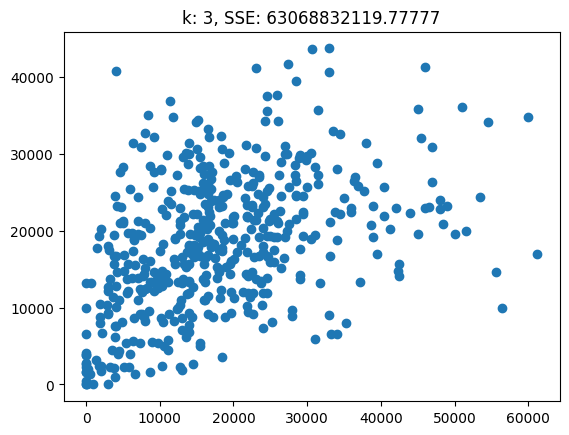

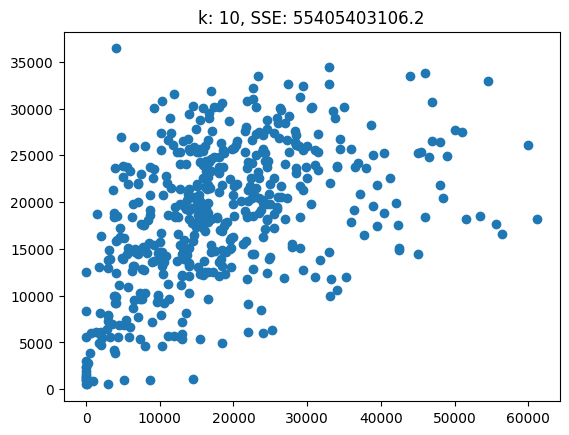

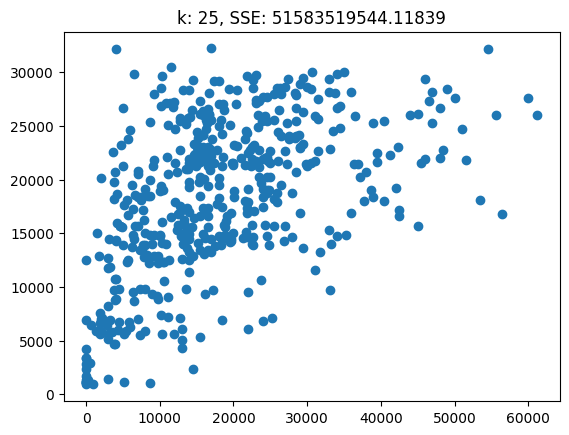

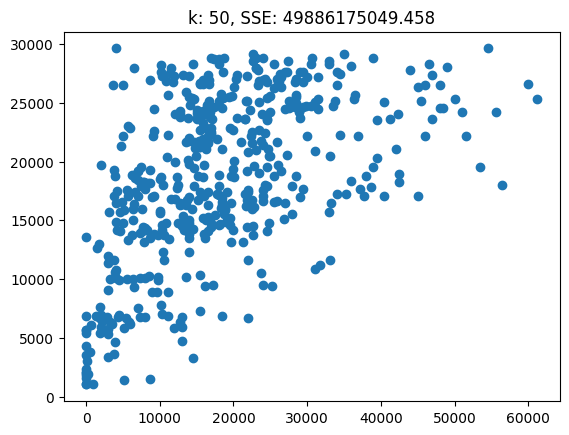

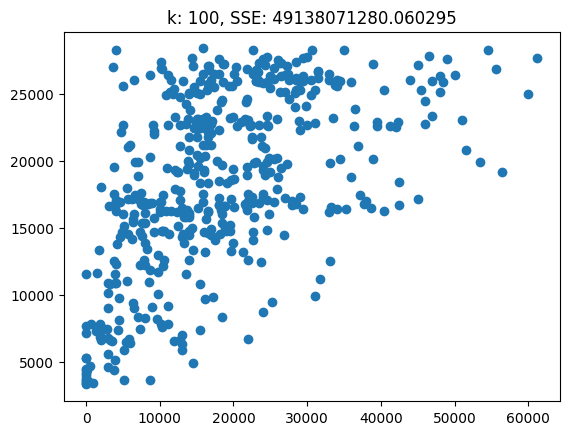

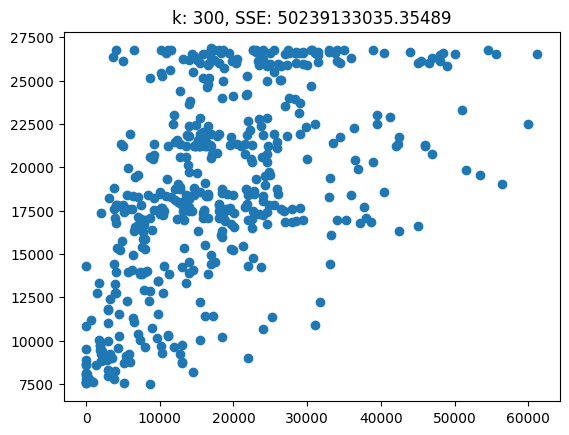

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

for k in [3,10,25,50,100,300]:
  model = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
  y_hat = model.predict(X_test)
  SSE = np.sum( (y_test-y_hat)**2 )

  plt.scatter(y_test,y_hat)
  plt.title('k: '+str(k)+', SSE: '+str(SSE))
  plt.show()

As k increases the accuracy of the predictions decreases - the data points go from clustered to more scattered across the x axis.

5.

In [ ]:
k_bar = 300
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)

for k in range(k_bar):
    fitted_model = KNeighborsRegressor(n_neighbors = k+1).fit(X_train, y_train)
    y_hat = fitted_model.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 )

## finding the k with the minimum SSE
SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index]
print("Optimum k = ", k_star)

Optimum k =  [76]


6.

The optimum k value is 76, so the first three scatterplots are underfitting, showing high amounts of variance. k=50 and 100 are close to optimal. However, k=300 is overfitting as the points begin to form horizontal groups.

Question 2:

1.

In [5]:
df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')
df = df.drop('time', axis=1)
print(df.shape)
df.head()

(299, 12)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,1.00000


There are no NAs to handle.

2.

In [7]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


Serum creatinine, ejection fraction, and age have the highest correlation with a death event.

3.

In [15]:
vars = ['anaemia','diabetes','high_blood_pressure','sex','smoking']

for v in vars:
    print(df.loc[:,[v,'DEATH_EVENT']].groupby(v).describe(), '\n')

        DEATH_EVENT                                             
              count      mean       std  min  25%  50%  75%  max
anaemia                                                         
0             170.0  0.294118  0.456991  0.0  0.0  0.0  1.0  1.0
1             129.0  0.356589  0.480859  0.0  0.0  0.0  1.0  1.0 

         DEATH_EVENT                                             
               count      mean       std  min  25%  50%  75%  max
diabetes                                                         
0              174.0  0.321839  0.468530  0.0  0.0  0.0  1.0  1.0
1              125.0  0.320000  0.468353  0.0  0.0  0.0  1.0  1.0 

                    DEATH_EVENT                                             
                          count      mean       std  min  25%  50%  75%  max
high_blood_pressure                                                         
0                         194.0  0.293814  0.456687  0.0  0.0  0.0  1.0  1.0
1                         105.0  

When high blood pressure takes the value 1, a higher proportion of the population dies.